In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re


In [ ]:
df = pd.read_csv("twitter_training.csv", header=None, names=["id", "entity", "sentiment", "content"])

df.dropna(inplace=True)

print("Columns:", df.columns)


Columns: Index(['id', 'entity', 'sentiment', 'content'], dtype='object')


In [ ]:

def clean_text(text):
    text = re.sub(r"http\S+", "", str(text))
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    return text.lower()

df['clean_content'] = df['content'].apply(clean_text)
print(df.columns)


Index(['id', 'entity', 'sentiment', 'content', 'clean_content'], dtype='object')


<ipython-input-33-2737155234>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="coolwarm")


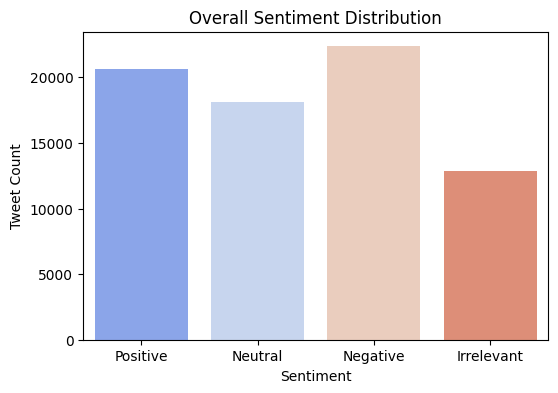

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="sentiment", palette="coolwarm")
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


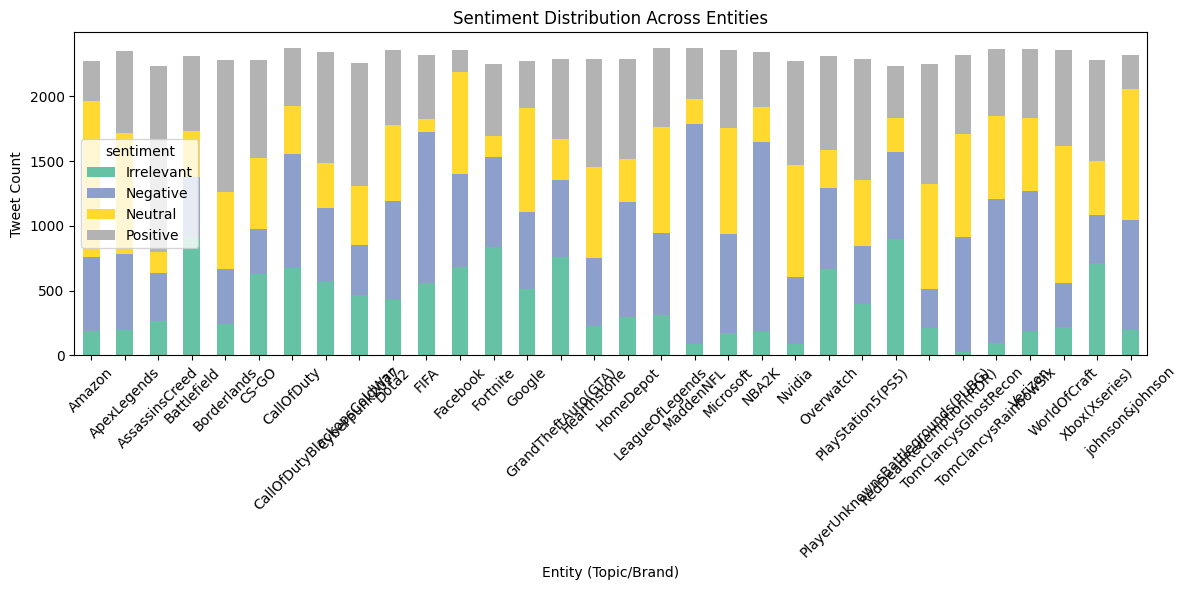

In [ ]:
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)

entity_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Sentiment Distribution Across Entities")
plt.xlabel("Entity (Topic/Brand)")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


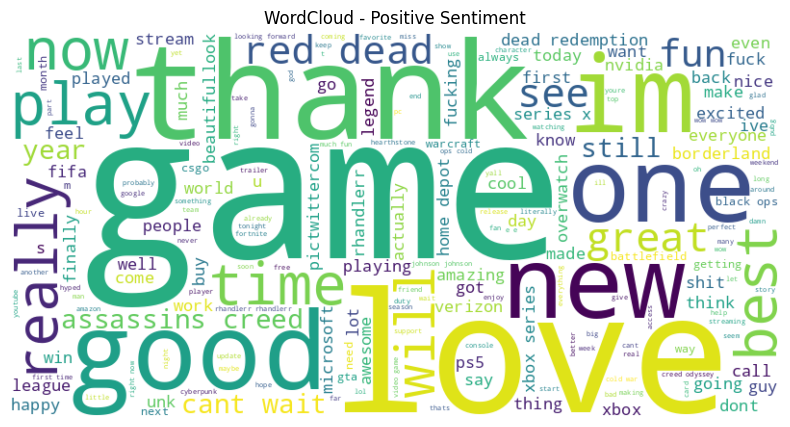

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

positive_text = " ".join(df[df['sentiment'].str.lower() == 'positive']['clean_content'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Sentiment")
plt.show()


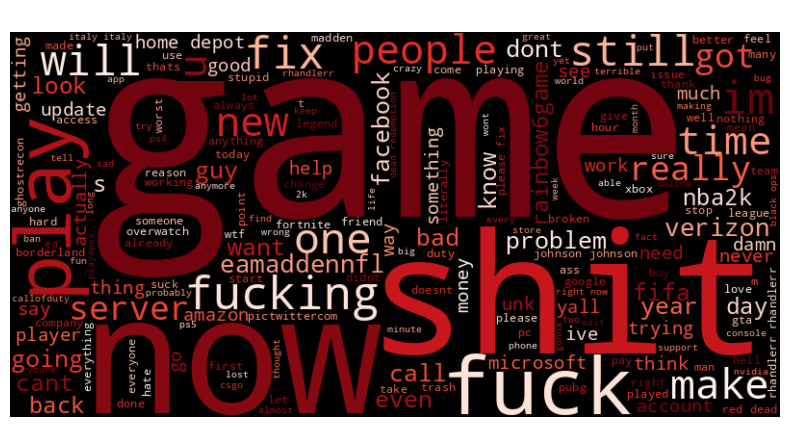

In [ ]:
negative_text = " ".join(df[df['sentiment'].str.lower() == 'negative']['clean_content'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', stopwords=STOPWORDS).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Sentiment", color='white')
plt.show()
